In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_rivers_of_Belarus'
resp = requests.get(URL)
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
    df = pd.read_html(str(tab))[0]
df

,Name,"Total, km","In Belarus, km"
0,Dnieper River,2145,690
1,Western Dvina,1020,328
2,Neman River,937,459
3,Bug River,831,169
4,Pripyat River,761,495
5,Sozh River,648,493
6,Berezina River,613,613
7,Vilija,510,276
8,Ptsich,421,421
9,Shchara,325,325


In [17]:
X = df['Total, km'].values
Y = df['In Belarus, km'].values


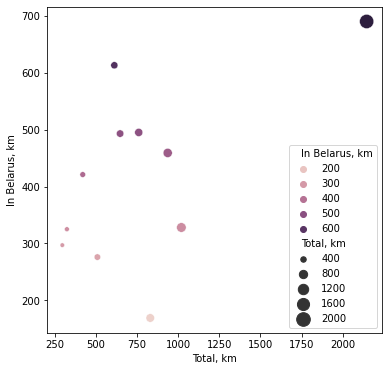

In [10]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(
    x = 'Total, km',
    y = 'In Belarus, km',
    data = df,
    hue = 'In Belarus, km',
    size = 'Total, km',
    sizes = (20, 200),
    legend = 'brief'
)
plt.show()

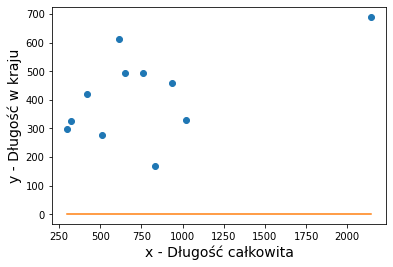

In [11]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

a_est, b_est = 0, 0

X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)
plt.show()

Text(0, 0.5, 'y - Długość w kraju')

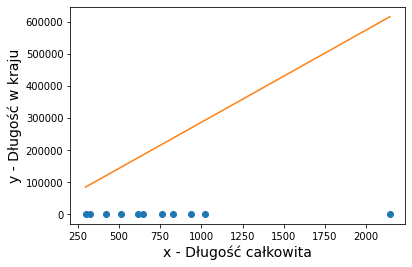

In [12]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

xAvr = X.mean()
yAvr = Y.mean()
dataSize = X.size

a_est = 0
b_est = 0

# liczymy b
up = 1
for i in range(0, dataSize):
    up = up + ( X[i] * Y[i] )
up = up - ( dataSize * xAvr * yAvr )

down = 1
for i in range(0, dataSize):
    down = down + X[i]**2
down = down - ( dataSize * xAvr**2 )

b_est = up / down
a_est = yAvr - b_est * xAvr


X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)


In [23]:
from numpy.linalg import det, inv, matrix_power

theta = matrix_power(np.dot(X, np.transpose(X)), -1)
theta

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional